In [103]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
color = sns.color_palette()
sns.set_style('darkgrid')
import warnings
warnings.filterwarnings('ignore')
from scipy import stats
from scipy.stats import norm, skew
pd.set_option('display.float_format', lambda x: '{:.3f}'.format(x))


# 1.1数据摘要

In [104]:
df = pd.read_csv('Winemage/winemag-data_first150k.csv')
print('(1)标称属性')
print("标称属性有country，province，variety，winery")
# 不同变量的不同取值的频数
print("(2)不同变量的不同取值的频数")
columns = ['country', 'designation', 'province', 'region_1', 'region_2', 'variety', 'winery']
for column in columns:
    print(df[column].value_counts())
    print('-' * 50)

(1)标称属性
标称属性有country，province，variety，winery
(2)不同变量的不同取值的频数
US                        62397
Italy                     23478
France                    21098
Spain                      8268
Chile                      5816
Argentina                  5631
Portugal                   5322
Australia                  4957
New Zealand                3320
Austria                    3057
Germany                    2452
South Africa               2258
Greece                      884
Israel                      630
Hungary                     231
Canada                      196
Romania                     139
Slovenia                     94
Uruguay                      92
Croatia                      89
Bulgaria                     77
Moldova                      71
Mexico                       63
Turkey                       52
Georgia                      43
Lebanon                      37
Cyprus                       31
Brazil                       25
Macedonia                    16
Serbia     

In [105]:
print("数值属性")
print("(3)数值属性的五数概括")
def fiveNumber(nums):
    #五数概括 Minimum（最小值）、Q1、Median（中位数、）、Q3、Maximum（最大值）
    Minimum=min(nums)
    Maximum=max(nums)
    Q1=np.percentile(nums,25)
    Median=np.median(nums)
    Q3=np.percentile(nums,75)
    IQR=Q3-Q1
    lower_limit=Q1-1.5*IQR #下限值
    upper_limit=Q3+1.5*IQR #上限值
    
    return Minimum,Q1,Median,Q3,Maximum
print('points'+str(fiveNumber(df['points'])))
data=pd.DataFrame(data=df[['price']])
d=data.dropna(axis=0,how='any')
print("price:"+str(fiveNumber(d.values.flatten())))
print('(4)数值属性的缺失值个数')
print(df.isnull()[['points', 'price']].sum())

数值属性
(3)数值属性的五数概括
points(80, 86.0, 88.0, 90.0, 100)
price:(4.0, 16.0, 24.0, 40.0, 2300.0)
(4)数值属性的缺失值个数
points        0
price     13695
dtype: int64


# 1.2数据可视化
由于points的取值是离散值，为每一个取值都加上一个服从正态分布的随机数。因为正态分布的和仍是正态分布，如果points服从正态分布的话，其和也应该服从正态分布。

(1)points的数据分布图


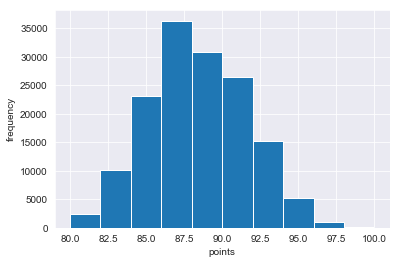

(2)price的数据分布图


Text(0, 0.5, 'frequency')

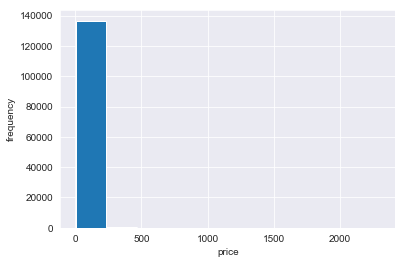

In [106]:
print("(1)points的数据分布图")
plt.show()
df['points'].hist()
plt.xlabel('points')
plt.ylabel('frequency')
plt.show()
print("(2)price的数据分布图")
df['price'].hist()
plt.xlabel('price')
plt.ylabel('frequency')

(3)points的正太分布图以及QQ图

 mu = 87.89 and sigma = 3.37



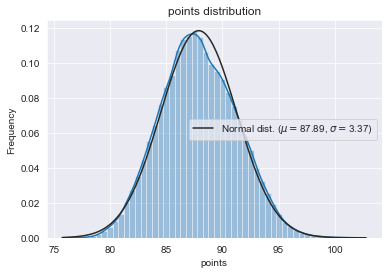

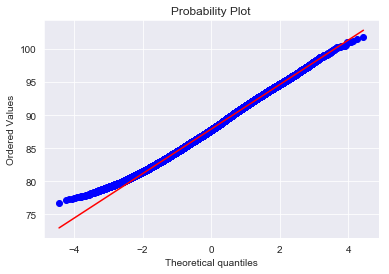

In [107]:
print("(3)points的正太分布图以及QQ图")
points = df['points'].apply(lambda x: x + np.random.normal())
sns.distplot(points, fit=norm);
mu, sigma = norm.fit(points)
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

plt.legend(['Normal dist. ($\mu=${:.2f}, $\sigma=${:.2f})'.format(mu, sigma)], loc='best')
plt.ylabel('Frequency')
plt.title('points distribution')

#Q-Q图
fig = plt.figure()
res = stats.probplot(points, plot=plt)
plt.show()

(4)price的正太分布图以及QQ图

 mu = 33.13 and sigma = 36.34



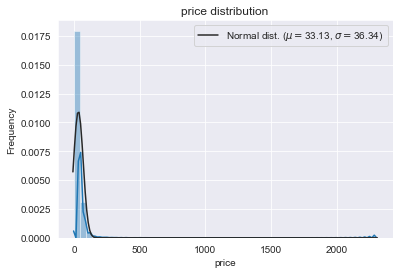

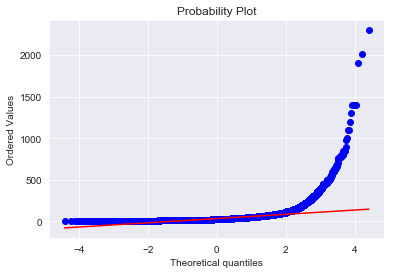

price 不服从正太分布


In [108]:
print("(4)price的正太分布图以及QQ图")
price = df['price'].dropna()
price = price.apply(lambda x: x + np.random.normal())
sns.distplot(price, fit=norm);
mu, sigma = norm.fit(price)
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

plt.legend(['Normal dist. ($\mu=${:.2f}, $\sigma=${:.2f})'.format(mu, sigma)], loc='best')
plt.ylabel('Frequency')
plt.title('price distribution')

#Q-Q图
fig = plt.figure()
res = stats.probplot(price, plot=plt)
plt.show()
print("price 不服从正太分布")

(5)points的盒图以及离群点


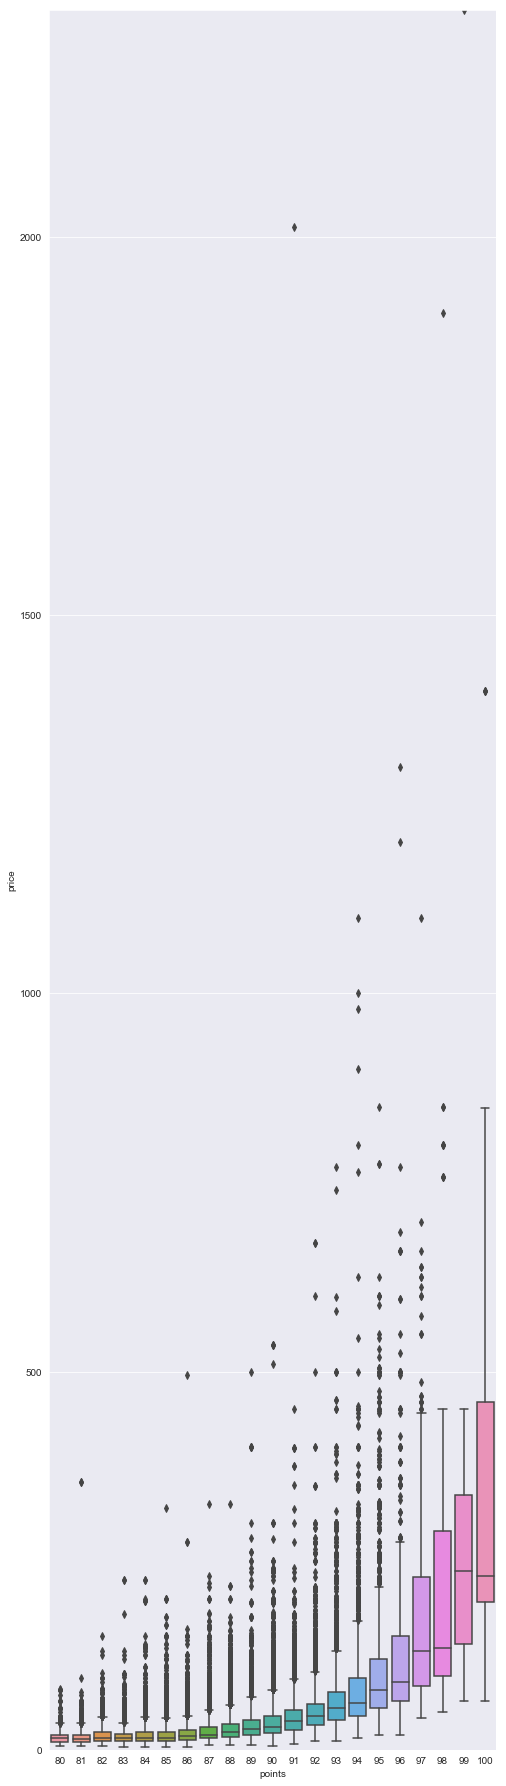

In [109]:
print("(5)points的盒图以及离群点")
var = 'points'
data = pd.concat([df['price'], df[var]], axis=1)
f, ax = plt.subplots(figsize=(8, 32))
fig = sns.boxplot(x=var, y="price", data=data)
fig.axis(ymin=0, ymax=2300);

经过盒图可以发现，对不同评分的酒来说，价格较低的酒占了绝大部分，价格较高的酒被视为“离群值”。不过这种方法判别出的离群值不是很准确，所以不能够说此盒图中的离群点就是真正的离群值。

# 2.填补缺失值

(1)缺失值的数量
(2)缺失值占各样本数的比例
可见缺失四种属性的数据


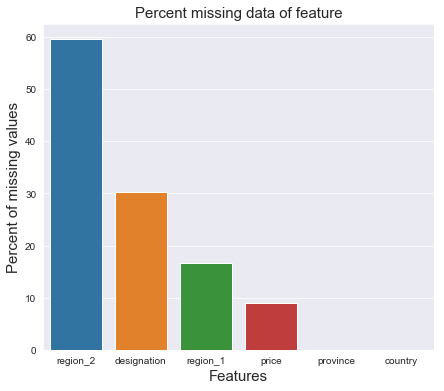

In [110]:
print("(1)缺失值的数量")
df.isnull().sum()
print("(2)缺失值占各样本数的比例")
all_data_na = (df.isnull().sum() / len(df)) * 100
all_data_na = all_data_na.drop(all_data_na[all_data_na == 0].index).sort_values(ascending=False)
missing_data = pd.DataFrame({'Missing Ratio':all_data_na})
missing_data
fig = plt.figure(figsize=(7, 6))
sns.barplot(x=all_data_na.index, y=all_data_na)
plt.xlabel('Features', fontsize=15)
plt.ylabel('Percent of missing values', fontsize=15)
plt.title('Percent missing data of feature', fontsize=15)
print('可见缺失四种属性的数据')

(1)直接删除缺失数据price


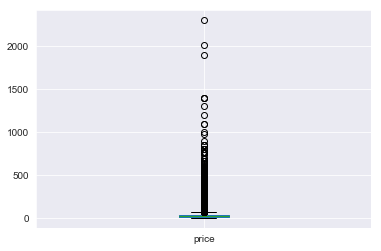

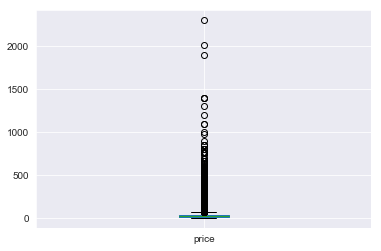

发现删除price属性中的缺失数据，对数据分布没影响


In [111]:
print('(1)直接删除缺失数据price')
box=pd.DataFrame(df['price'])
box.boxplot()
plt.show()

box=pd.DataFrame(df['price'].dropna(axis=0,how='any'))
box.boxplot()
plt.show()
print('发现删除price属性中的缺失数据，对数据分布没影响')


In [112]:
print('country信息缺失的数据同时也缺失province和region_1,region_2数据，对这五条数据直接进行删除')
df.drop(df[df['province'].isnull()].index, inplace=True)

country信息缺失的数据同时也缺失province和region_1,region_2数据，对这五条数据直接进行删除


In [113]:
print('(2)高频词填充')
print('designation 缺失的数量为：')
print(df.isnull()[['designation']].sum())
df['designation'].value_counts()
print('disignation列没有某一个取值的频率特别高，最高是2000多次，而此列缺失值的样本数有4万5千多，如果将缺失值填补为出现次数最多的种类，将于真实数据有较大的偏差，所以将缺失值填补为None，代表没有葡萄种类信息。')
df['designation'] = df['designation'].fillna('None')
print('(*******)填充之后的效果为：')
print(df.isnull().sum())

(2)高频词填充
designation 缺失的数量为：
designation    45735
dtype: int64
disignation列没有某一个取值的频率特别高，最高是2000多次，而此列缺失值的样本数有4万5千多，如果将缺失值填补为出现次数最多的种类，将于真实数据有较大的偏差，所以将缺失值填补为None，代表没有葡萄种类信息。
(*******)填充之后的效果为：
Unnamed: 0         0
country            0
description        0
designation        0
points             0
price          13695
province           0
region_1       25055
region_2       89972
variety            0
winery             0
dtype: int64


(3)对象之间的相似性填充
因为price与points大致成正比，我们将其填补为与其评分相同的其他红酒的平均价钱
137230


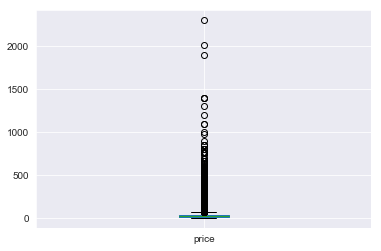

150925


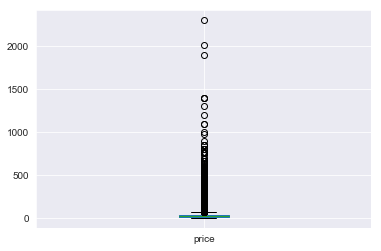

(*******)填充之后的效果为：
Unnamed: 0         0
country            0
description        0
designation        0
points             0
price              0
province           0
region_1       25055
region_2       89972
variety            0
winery             0
dtype: int64


In [114]:
print('(3)对象之间的相似性填充')
print('因为price与points大致成正比，我们将其填补为与其评分相同的其他红酒的平均价钱')
box=pd.DataFrame(df['price'])
print(df['price'].count())
box.boxplot()
plt.show()
df['price'] = df.groupby('points')['price'].transform(lambda x : x.fillna(x.mean()))
box=pd.DataFrame(df['price'])
print(df['price'].count())
box.boxplot()
plt.show()
print('(*******)填充之后的效果为：')
print(df.isnull().sum())


In [115]:
print('(4) 通过属性之间的相关性填充,将region_1填充为出现频率最高的地点')
df['region_1'].value_counts().index[0]

(4) 通过属性之间的相关性填充,将region_1填充为出现频率最高的地点


'Napa Valley'

In [116]:
df['region_1'] = df['region_1'].fillna(df['region_1'].value_counts().index[0])
df.isnull().sum()

Unnamed: 0         0
country            0
description        0
designation        0
points             0
price              0
province           0
region_1           0
region_2       89972
variety            0
winery             0
dtype: int64

In [121]:
print('5根据数据集说明，region_2为nan的代表没有更具体的生产地点，填充为None')
df['region_2'] = df['region_2'].fillna('None')
all_data_na = (df.isnull().sum() / len(df)) * 100
all_data_na = all_data_na.drop(all_data_na[all_data_na == 0].index).sort_values(ascending=False)
missing_data = pd.DataFrame({'Missing Ratio':all_data_na})
missing_data
print('可见数据集里面都已经填充了数据')
df.isnull().sum()


5根据数据集说明，region_2为nan的代表没有更具体的生产地点，填充为None
可见数据集里面都已经填充了数据


Unnamed: 0     0
country        0
description    0
designation    0
points         0
price          0
province       0
region_1       0
region_2       0
variety        0
winery         0
dtype: int64

填充之后的数据分布图
(1)points的数据分布图


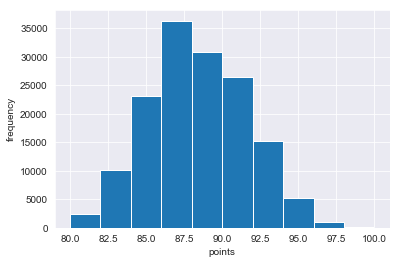

(2)price的数据分布图


Text(0, 0.5, 'frequency')

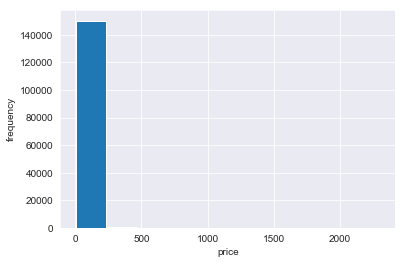

In [128]:
print('填充之后的数据分布图')
print("(1)points的数据分布图")
plt.show()
df['points'].hist()
plt.xlabel('points')
plt.ylabel('frequency')
plt.show()
print("(2)price的数据分布图")
df['price'].hist()
plt.xlabel('price')
plt.ylabel('frequency')
